#Bloom Filters - Implementation, Analysis and Extensions

For this assignment, I will be implementing and analyzing a specific kind of Bloom filter known as the counting bloom filter, which is an extension of the ordinary bloom filter and has similar operations and behavior. 

##Overview
A bloom filter is a probabilistic data structure works best predominately for search queries which query whether or not an element is in an existing set of elements. The bloom filter evaluates the item beign query and returns whether the item is in the set of elements or not. However, the bloom filter may incorrectly indicate that an item is in the set when it is not, and therefore the set of elements need to be checked for the element to confirm if the element is really present or not. 

The bloom filter has consists of a bitarray that has a set of bits which serves as a "gate" to determine access to an underlying data structure that contains the elements - ususally an array, but other data structues can be used as well depending on the nature of the element type. The bloom filter turns away requests if it determines the item being queried is not in the underlying data stucture, but if it accepts requests there is still a possibility it is incorrect in its determination that the item being queried is in the underlying data structure .


##Counting Bloom Filter 

A counting bloom array solves for this by increasing the size of each bit in the bitarray from a 2-bit bitarray to a 5,6 or 7 bit bitarray. This enables each bit to store not just a binary but an integer. When an element is added to the bitarray, the corresponding bits are incremented by 1, and when an element is removed, the corresponding bits are decreased by 1. This enables elements to be removed from the bloom filter without any effect on the accuracy of predicting other elements that also map to the same bit. 

The added functionality of the bloom filter comes at a cost in terms of memory, as the memory needed increases by a multiple depending on the bitarray bit size. However, on the other hand, this ability to delete elements makes the bloom filter effective in situations where the underlying data structure is not static but has deletions. In a standard bloom filter, everytime an element is deleted, the bloom filter needs to be re-initialized, which has a complexity of O(n) if the underlying data structure is an array. However, in a counting bloom filter, the deletion complexity of O(1). 

This could prove useful in real-world situations where assets have fluid ownership and there is a constant flow of requests to rent these assets. However, when the assets are owned, the requests have to be returned as negative. This would be especially useful in trading platforms where there is a heavy volume of algorithmic trading. Because algorithms are submitting buy/sell requests several thousand times per minute, by decreasing the time required to return a negative value, the trading volume is increased and hence the profits of the trading platform. 

The operations of this counting bloom filter will be discussed later

##Implement a Bloom filter.

In [1]:
!pip install pyhash


    100% |████████████████████████████████| 604kB 7.4MB/s 
  Running setup.py bdist_wheel for pyhash ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/0a/dd/92/06521a3888c2b46df4a189f3458a78de4d769764f2a5ec639d
Successfully built pyhash


In [3]:
'''
Counting Bloom Filter Implementation 

'''

import pyhash


class CountingBloomFilter(object): 
  '''
  Class for a counting bloom filter. This class is invoked to create a new 
  instance of the counting bloom filter whenever required
  
  '''

  def __init__(self,bitarray_length,hash_count): 
    '''
    Function purpose : To create a new counting Bloom filter 
    
    Arguments: 
    bitarray_length: int, size of the bitarray
    hash_count: int, number of hash Functions used on each element 
    
    Process: 
    A new counting bloom filter is created with 4 attributes - number of 
    hash functions,bit vector, false positive counter and storage array
    
    Output: 
    No return values
    
    '''
    
    self.hash_count = hash_count
    self.bit_array = bit_vector = [0] * bitarray_length
    self.bitarray_length = bitarray_length
    self.false_positive_counter = [0,0]
    self.storage = []
    
  def hashThis(self,hashIndex,input):
    
    '''
    Function purpose: To hash a incoming string to give an index of the bitarray
    to mark the storage the input. The hashthis function is called once for each 
    hash function, and by seeding with a different index, a different hash 
    function is created 
    
    
    Arguments: 
    hashIndex: int, index of the hash function as multiple hash functions used
    input: item to be hashed
      
    Process: 
    The fnv hash function from the pyhash library is seeded with the index to 
    ensure that the hash function returns a distinct index.Then, the hash 
    function is called on the input to give an index of the bitarray to increase
    the storage
    
    Output: 
    The index of the bitarray that should be marked 
    ''
    '''
    
    fp = pyhash.fnv1_32(hashIndex)
    returnValue = fp(input) % self.bitarray_length
    #print("NUMBER, RETURN VALUE",returnValue,self.bitarray_length)
    return (fp(input) % self.bitarray_length)
  
  def add(self,item): 
    '''
    Function purpose: Adds an item to the storage array, while marking the 
    element as stored by increasing the corresponding bits in the bit array
    
    Arguments: 
    The self object which was created, with the bit array, hash_count and 
    storage attributes, and the item to be inserted
    
    
    Process: 
    First, the item is searched for in the array using the search(item) 
    function. If it already exists, it is stated so
   
    Second, the element is run through all the hash functions, each of which is 
    invoked by seeding the hashThis function with a different number. The 
    bitarray index returned by each function is increased by 1
    Then, the element is stored in the storage array 
    
    Output: 
    No output is returned by this function - rather, the bitarray and storage 
    attributes of the object are modified to include the new item  
    
    '''    
    
    if self.search(item) == False: 
      for i in range (0,self.hash_count): 
        self.bit_array[self.hashThis(i,item)] += 1 
      self.storage.append(item)
    else: 
      raise Exception("Item already in storage")
    self.false_positive_counter = [0,0]
    #print(self.bit_array)

  def search(self,item): 
    
    '''
    Function purpose: Searches for the presence of an item in the storage array
    
    Arguments: 
    The self object which was created, with the bit array, hash_count,storage 
    and false_positive_counter attributes, and the item to be searched for 
    
    
    Process: 
    First, the element is run through all the hash functions. The bitarray index 
    returned by each function is examined. If it is 0, it indicates the item in
    question does not exist in the storage set, and a FALSE value is returned. 
    If all the bitarray indexes return a number other than 0, then the element 
    is searched for in the storage array - with the function returning TRUE if 
    found or FALSE if not. 
    
    Output: 
    TRUE/FALSE binary on whether the storage index contains the item being 
    searched for. 
    Though not an output, the false_positive_counter attribute is also modified
    to keep track of what the total number of true-positives and false-positives 
    are. 
    ''' 
    
    any_positive_binary = 1
    for i in range (0,self.hash_count): 
      if (self.bit_array[self.hashThis(i,item)] == 0):  
        any_positive_binary = 0

       
        

    
    if any_positive_binary == 1: 
      false_positive_binary = 1
      for i in range (0,len(self.storage)): 
        if self.storage[i] == item: 
          false_positive_binary = 0
          
      if false_positive_binary == 1:
        self.false_positive_counter[1] += 1 #false positive  
      else: 
        return True
    else: 
      self.false_positive_counter[0] += 1   #true negative
    return False
  
  def delete(self,item): 
    '''
    Function purpose: Deletes an item from the storage array, and reduces the 
    item's corresponding indexes in the bitarray
    
    Arguments: 
    The self object which was created, with the bit array, hash_count,storage 
    and false_positive_counter attributes, and the item to be deleted
    
    
    Process: 
    First, the search(item) function checks if the item is in the storage array.
    If it is not, an exception is raised that the item is not in the set 
    First, the element is run through all the hash functions. The bitarray index 
    returned by each function is reduced by 1. Then the element 
    is removed storage array. 
    
    Output: 
    No output is returned for this function. 
    '''
    if self.search(item): 
      for i in range (0,self.hash_count): 
        self.bit_array[self.hashThis(i,item)] -= 1
      self.storage.remove(item)
    else: 
      raise Exception("Item not in set")



import random
import uuid 

'''
The parameters for the bloom filter are first stated and used to initialize a 
bloom filter
'''
bitarray_length = 3000
hashFunction_count = 5
storageItemNumber = 500
testItemNumber = 20000

bloomf = CountingBloomFilter(bitarray_length,hashFunction_count)


'''
A list of random words is created, then added into the Blom filter 
'''


for i in range(0,storageItemNumber): 
  bloomf.add(str(uuid.uuid4()))


'''
The wordArray is expanded to include words that are not in the Bloom filter,
then words are randomly searched for the false positive rate is noted. 

'''
for i in range (0,testItemNumber): 
  bloomf.search(str(uuid.uuid4()))

print("False Positive, True Negative, Total Number, False positive rate", bloomf.false_positive_counter[1],  bloomf.false_positive_counter[0],bloomf.false_positive_counter[1]+bloomf.false_positive_counter[0],bloomf.false_positive_counter[1]/(bloomf.false_positive_counter[1]+bloomf.false_positive_counter[0]))




False Positive, True Negative, Total Number, False positive rate 1204 18796 20000 0.0602


In [0]:
import uuid 
print(str(uuid.uuid4()))

wordArray = RandomWords().get_random_words(limit=testItemNumber)

In [0]:
bloomf.false_positive_counter = [0,0]
for i in range (0,testItemNumber): 
  searchNumber = random.randint(0,len(wordArray) - 1)
  searchedWord = wordArray[searchNumber]
  bloomf.search(searchedWord)

print("False Positive, True Negative, Total Number, False positive rate", bloomf.false_positive_counter[1],  bloomf.false_positive_counter[0],bloomf.false_positive_counter[1]+bloomf.false_positive_counter[0],bloomf.false_positive_counter[1]/(bloomf.false_positive_counter[1]+bloomf.false_positive_counter[0]))



##Operations

After being initialized, the ordinary bloom filter supports only the addition of an element and searching of an element. The counting bloom filter expands on this functionality by also supporting the deletion of elements from a set. Each of these operations will now be explained. 

###Initialization

Initialization of a Bloom filter consists of taking each element, putting it through all hash functions and marking the corresponding bits on the bitarray. This is a O(n) order operation, with n representing the number of elements being stored - for each element, there is a constant number of operations in terms of accessign the element, putting it through the 2 hash functions, and marking the bitarray. 

###Addition

To add an element to a bloom filter, the element is first run through k number of hash functions. Each hash function takes in the element and returns the index of the bitarray where the element should be marked. The relevant indices are then marked. In a ordinary bloom filter bitarray which consists of 2-bit binaries, they will be converted from a 0 to a 1. On the other hand, a counting bloom filter bitarray consists of i-bit binaries, where i depends on the maximum integer value of the bit that the bloom filter is being designed for. A counting bloom filter bitarray is marked by increasing the integer value of the relevant bit by 1. This is a O(1) order operation because there is a fixed number of steps to mark the bitarray. 

###Searching

To search for an element to a ordinary or counting bloom filter, the element is first run through k number of hash functions. Each hash function takes in the element and returns the index of the bitarray where the element should be marked. The relevant indices are then searched. If they are marked "0", then the element being searched for is absent from the bloom filter, and the bloom returns that the element is not in the bloom filter. 

However, each bit in the bitarray can be marked not just by one element but by several elements, as each of these elements can return the same index when passed through the hash function. Therefore, when searching for an element that is absent from the set, there is a probability that the bloom filter will return that the element is in the set, as all the indices in the bitarray returned by the hash functions have a value that is positive because they have been marked positive by other elements in the set. Therefore, the storage set itself needs to be checked for the element to confirm if the element is in the set. 

In essence, when a bloom filter returns that an element is not in a set, it is 100% accurate. However, when a bloom filter returns that an element is in a  set, it is not 100% accurate, with the percentage varying based on bitarray size, number of elements being stored, and number of hash functions. 

Search time complexity wise, here are 2 distinct groups of cases for the Bloom filter.In the first case,  the item being queried for is in the set, and in the second case it is not. 

In the first case, after the bloom filter returns True, the underlying data structure needs to be queried for the element being searched for anyway. Therefore the underlying complexity of the underlying data structure is maintained - if it is an array, the retrieval complexity remains O(n) with n being the size of the set being searched. The bloom filter itself adds ki operations for each element being queried, where k is the number of hash functions, i is a constant for the number of operations in each hash function + 1 step to search the bitarray.This is a O(1) operation on the bloom filter bitarray-level, so overall the complexity remains O(n).

However, in the second case, if the bloom filter gives a true negative value instead of a false positive value, the order of operations is just O(1).  The bloom filter has a constant number of steps to hash the value, check the array and return that the element being searched for is absent. This is a significant improvement on the complexity of searching through the underlying data structure itself to return that the element is absent. 

A few key considerations that determines the efficency of the bloom filter, in terms of access times and false positive rates (which in turn determine complexity, as outlined above), are the memory size, number of hash functions, and number of items stored. The benefits and tradeoffs of each of these will be explored later in this paper. 


###Real world operations 

In summary, a Bloom filter is a data structure that acts as a "filter" to the actual underlying data structure where the information is stored, to improve the efficiency by making negative responses to queries an O(1) order operation rather than being an operation that has the complexity of the underlying data structure, which is O(n) for arrays. 

The bloom filter is useful for real-world operations that require checking an input against a existing set in a rapid manner, where there is a significant possibility that the input does not exist in the existing set, which is the case where the bloom filter increases efficiency. Real-world examples include checking a database of usernames if a new username is valid, or if a given email address is in a list of spam-mail email addresses - because the negative "NO" response is O(1), as compared to O(n) if the entire underlying data structure is examined, runtime for the end user is significantly smaller. 

However, a typical Bloom filter, which only has a 2-bit bitarray, only allows each bit to be 0 or 1 . Therefore, it is not possible to delete any element from the Bloom filter. This is because if an element is deleted, the corresponding bits cannot be switched from 1 back to 0, because other elements may have the same bit marked as 1. Therefore, by marking the bit as 0, all elements that map to that bit will be incorrectly marked as absent. 


##Give a description of the hash functions that your implementation uses.

This paper's implementation of the Bloom filter uses the pyhash library's Fowler–Noll–Vo (fnv) hash. The hash function takes in the data being hashed as an argument. 

For each input element, it multiplies the offset_basis, which is a constant depending on the size of the hash(which is constant in this case), by FNV_prime. 
*  Offset bias is an integer whose value depends on the size of the hash but is roughly 1.0* 10^78 for for this implementation of the bloom filter, which hashes a 36-bit alphanumeric number. 
* FNV Prime is  a prime number seeded by an input number at initialization. Therefore, by seeding the hash function with different numbers at initialization, we can get distinct hash funcitons as the FNV_prime number is different. 

The 2 terms multiplied constitute the hash that will be used on the data.The hash is then used on the data, and the result is returned. 

This function is shown in the code below. 


In [0]:
hash = offset_basis
for each octet_of_data to be hashed
        hash = hash * FNV_prime
        hash = hash xor octet_of_data
return hash

This hash function was evaluated along 3 metrics: speed, diffusion and determinism. 
* Speed: How quickly the hash function returns an output
* Diffusion: How spread out the values returned by the hash function are; whether there is significant clustering
* Determinsim: Whether the hash function gives the same output for the same input



####Speed

The fnv hash function is a non-cryptographic hash function, and hence is fast to compute

####Diffusion 
The diffusion of the FNV hash function was tested using the code below, which compared a list of 100 items being inserted into a counting Bloom Filter using either a random insertion or an fnv hash function.  The FNV hash function actually had a more even distribution of random numbers compared to random insertion, which makes it highly effective in terms of ensuring all values are evenly distributed. 

This is because of how the fnv hash function multiplies all inputs by prime numbers. Therefore, there is little chance that consecutive elements will occupy consecutive positions in the bitarray, and the risk of collision is reduced . Moreover, an addition in this paper's implementation of the bloom filter hash function is that the output of the hash function is modded  by the length of the bitarray, which futher ensures that clustering does not occur. 

####Determinism 
The FNV test function is also deterministic - every input always maps to the same output. This is demonstrated in the deterministic test code written below, where an element is first inserted, then immediately deleted. If the hash function is not deterministic, it will not be possible to delete the element because the bit array indexes returned by the hash function will not correspond to the bit array indexed when the element was inserted into the bitarray. 

In [4]:
'''
Diffusion test code 

'''


bitarray_length = 20
hashFunction_count = 5

diffusionBloomf = CountingBloomFilter(bitarray_length,hashFunction_count)



for i in range(0,100): 
  diffusionBloomf.add(str(uuid.uuid4()))

print(diffusionBloomf.bit_array)
print("Range of values for FNV function:", max(diffusionBloomf.bit_array) - min(diffusionBloomf.bit_array))

for i in range(0,len(diffusionBloomf.storage)): 
  diffusionBloomf.delete(diffusionBloomf.storage[0])
  
for i in range(0,100):
  randomNumber = random.randint(0,len(diffusionBloomf.bit_array))
  for i in range(0,hashFunction_count): 
    diffusionBloomf.bit_array[randomNumber - 1] += 1

print(diffusionBloomf.bit_array)
print("Range of values for random insertion:", max(diffusionBloomf.bit_array) - min(diffusionBloomf.bit_array))
  

[18, 24, 28, 26, 32, 20, 22, 22, 28, 28, 22, 27, 26, 29, 27, 30, 19, 26, 25, 21]
Range of values for FNV function: 14
[15, 40, 25, 25, 25, 35, 30, 30, 40, 25, 15, 30, 10, 30, 15, 30, 20, 20, 15, 25]
Range of values for random insertion: 30


In [5]:
'''
Determinism test code 

'''
bitarray_length = 20
hashFunction_count = 5
errorCounter = 0

determinismBloomf = CountingBloomFilter(bitarray_length,hashFunction_count)
for i in range (0,1000): 
  valueAdded = str(uuid.uuid4())
  determinismBloomf.add(valueAdded)
  determinismBloomf.delete(valueAdded)
  if sum(determinismBloomf.bit_array) != 0: 
    errorCounter += 1 

print("Total number of non-deterministic hashes:",errorCounter)
  
  

Total number of non-deterministic hashes: 0


##Provide an analysis of how your implementation scales in terms of:
- memory size as a function of the false positive rate
- memory size as a function of the number of items stored
- access time as a function of the false positive rate
- access time as a function of the number of items stored

In a bloom filter, there are 4 distinct variables which can be manipulated or observed 
* Memory size: The size of the bit array used
* Number of items stored 
* False positive rate 
* Number of hash functions 
* Access time 


First, this paper will investigate the relationship between the following pairs of variables, with all other variables being held constant
* number of hash functions and false positive rate 
* memory size and false positive rate
* memory size and number of items stored
* access time and false positive time
* access time and number of items stored

For each section, first the theoretical relationship will be calculated. Then, the bloom filter implementation will be tested to find the actual relationship

###Hash functions x False Positive Rate 

This implementation of bloom filters has the ability to accept and implement a variable number of hash functions. We will now attempt to find the ideal number of hash functions. We will first analyze the theoretical relationship between number of hash functions and false positive rate 

1) First, we see that the probability *bp*  that a particular bit is 0 after inserting n elements, hashed k times, into a size m bitarray is   *bp =* $(1- \frac{1}{m} ) ^{kn}$

2) The false positive rate p = $bp ^{k}$ =  $((1- \frac{1}{m} ) ^{kn}) ^ {k}$. This approximates to $(1-e^{\frac{-kn}{m}})^k$

3) Simplifying the equation as p tends to 0, k = $\frac{m}{n}log2$

We test this with a implementation of the Bloom Filter. The amount of items to be stored while the bit array memory size is varied, and the effect of this in terms of the number of hash functions that leads to the optimal false positive rate is observed. 

From the equation, it is expected that the optimal number of hash functions is roughly 0.7 the ratio of the memory size to the number of items stored. 

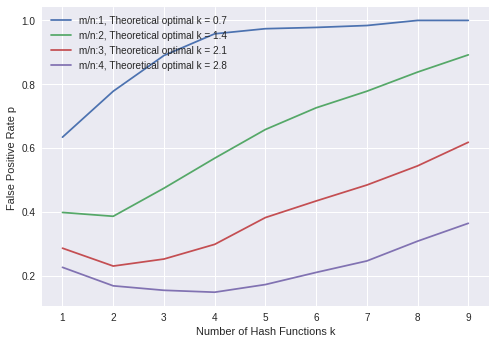

In [7]:

import matplotlib.pyplot as plt

inputRange = 10
inputData = [] 

for i in range(0,storageItemNumber):
  inputData.append(str(uuid.uuid4()))
  
searchData = []
for i in range(0,testItemNumber):
  searchData.append(str(uuid.uuid4()))


  
for exampleCounter in range(1,5): 
  xarray = []
  yarray = []
  bitarray_length = exampleCounter*1000
  storageItemNumber = 1000
  testItemNumber = 500

  hashFunctionBloomf = CountingBloomFilter(bitarray_length,hashFunction_count)
  for hashFunctionCounter in range(1,inputRange): 
    averageCounter = []
    for i in range(0,10): 

      hashFunctionBloomf = CountingBloomFilter(bitarray_length,hashFunctionCounter)

      for counterA in range(0,storageItemNumber): 
        hashFunctionBloomf.add(inputData[counterA])

      for counterB in range (0,testItemNumber): 
        hashFunctionBloomf.search(searchData[counterB])

      averageCounter.append(hashFunctionBloomf.false_positive_counter[1]/(hashFunctionBloomf.false_positive_counter[1]+hashFunctionBloomf.false_positive_counter[0]))
    xarray.append(hashFunctionCounter)
    yarray.append(sum(averageCounter)/len(averageCounter))
  title = "m/n:" + str(exampleCounter) + ", Theoretical optimal k = " + str(0.7*bitarray_length/storageItemNumber)
  plt.plot(xarray, yarray, label = title )
  
  
plt.legend()

plt.xlabel('Number of Hash Functions k')
plt.ylabel('False Positive Rate p ')


plt.show()





  



As can be seen from the plot, the number theoretical optimal number of hash functions matches closely with the actual number number of hash functions that gives the lowest false positive rate. Because the theoretical number is a float and not a integer, the real-world optimal consists of  a pair of 2 different numbers as the theoretical optimal lies between them. 



###Memory Size x False Positive Rate 

With the number of items being stored as a constant, the memory size also affects the false positive rate because the smaller the bit array memory size, the greater the number of activated bits in the bit array. This would increase the likelihood that for any given element being queried, the bits returned by the bitarray will be positive because they have been marked positive by other elements, even though the element being queried is not in the storage set.  

Deriving this mathematically, earlier we established that the false positive rate $p = (1-e^{\frac{-kn}{m}})^k$. Given a constant number of hash functions and number of items beign stored, we arrive at the formula $p = (1-e^{\frac{-a}{m}})^b$, where a and b are constants. 

This theoretical graph was plotted against the actual runtime of the algorithm, to test if the real-world implementation holds true to the theoretical result. Given we have confirmed that  $p = f(m), f(x) = (1-e^{\frac{-a}{m}})^b$, where a and b are constants, we can then derive $m = f^{-1}(p)$, which is plotted below


Note: Because the memory size is a variable, there is no constant optimal number of hash functions, and therefore 2 hash functions were used 

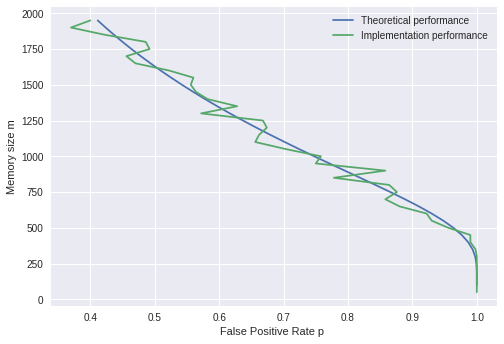

In [25]:
'''
Plot of Memory size x False Positive Rate
'''
import matplotlib.pyplot as plt
import math

hashFunction_count = 2
storageItemNumber = 1000
testItemNumber = 500

part1Bloomf = CountingBloomFilter(bitarray_length,hashFunction_count)

inputRange = 40
xarray = []
yarray = []
theoreticalxarray = []
theoreticalyarray = []
  
  
inputData = [] 
for i in range(0,storageItemNumber):
  inputData.append(str(uuid.uuid4()))
  
searchData = []
for i in range(0,testItemNumber):
  searchData.append(str(uuid.uuid4()))

  
for memorySizeBucketCounter in range(1,inputRange): 
  bit_array_size = memorySizeBucketCounter*50
  averageCounter = []
  for i in range(0,10): 

    part1Bloomf = CountingBloomFilter(bit_array_size,hashFunction_count)

    for counterA in range(0,storageItemNumber): 
      part1Bloomf.add(inputData[counterA])

    for counterB in range (0,testItemNumber): 
      part1Bloomf.search(searchData[counterB])

    averageCounter.append(part1Bloomf.false_positive_counter[1]/(part1Bloomf.false_positive_counter[1]+part1Bloomf.false_positive_counter[0]))
  yarray.append(bit_array_size)
  xarray.append(sum(averageCounter)/len(averageCounter))
  
  theoreticalyarray.append(bit_array_size)
  theoreticalxarray.append(math.pow((1-math.exp(-hashFunction_count*storageItemNumber/bit_array_size)),hashFunction_count))


plt.plot(theoreticalxarray[1:], theoreticalyarray[1:], label = "Theoretical performance" )
plt.plot(xarray, yarray, label = "Implementation performance" )

plt.legend()

plt.ylabel('Memory size m')
plt.xlabel('False Positive Rate p ')

plt.show()

  



As can be seen from the graph, the Bloom filter implementation performs close to the performance predicted by the formula. There are variations because of small variations in the speed of computation, but the general trend is followed. 



###Memory size x number of items stored


Memory size and number of items stored are 2 independent variables with no relationship unless we hold the other 2 variables constant, which this analysis will do. 

Earlier, we arrived at the formula $p = (1-e^{\frac{-kn}{m}})^k$.Holding p, the false positive probability and number of hash functions k constant, and shifting the terms to arrive at a relationship between m and n, we arrive at the relationship $\frac{nlogp}{log(1/(2^(log_{10}2))}$



###Access time x false positive rate


As outlined in the introduction, with the bloom filter, all values which the bloom filter returns "true" will have to be searched for in the underlying data structure, regardless if they are true positives or false positives. Assuming a list of only negative examples, the false positive rate therefore has a direct correlation with the total access time. If the false positive rate is 0.0 for a list of only negative examples, we will expect the access time to be O(1) and therefore 0 as well. If the false positive rate is 1.0, we will expect the access time to be O(n), as the underlying data structure is queried every. 

The actual implementation confirms this, with the overall access time approaching the array access time as the false positive rate gets closer to 1. The actual access time is greater than the array access time when the false positive rate is close to 1 because the bloom filter adds on operations to just array search and therefore adds time to the array access time. 

Extending this analysis, we can also include the percentage of queries in the incoming list to figure out the access time not only for all-false queries but both true and false queries. 

Let $t_{1}$ be the time taken to conduct the constant number of operations in the bloom filter , $t_{2}$ be the time taken to query the underlying data structure, assumed to be an array in this case, for the element, $x$ be the fraction of queries that are false and $y$ be the false positive rate, and $z$ be the access time for each query, on average, and $n$ be the number of queries. 

Now, we have established that when the query is negative, $z_{negative} = y*(t_{1} + t_{2}) + (1-y)*(t_{1}) = 1 - y*t_{2}$.

When the query is positive, 
$z_{positive}=t_{1}+t_{2}$

The total access time for n queries is $n*(x)*(z_{negative}) + n*(1 - x)*(z_{positive}) = n*(x)*(1 - y*t_{2}) +n*(1 - x)*(t_{1}+t_{2})$, which simplified gives us $n((x)*(1 - y*t_{2}) + (1 - x)*(t_{1}+t_{2}))$



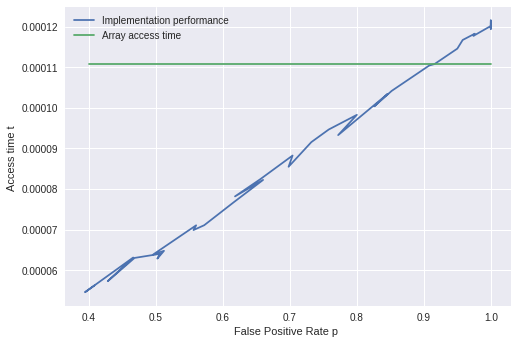

In [10]:
'''
Access time x false positive rate
'''
import matplotlib.pyplot as plt
import time

hashFunction_count = 2
storageItemNumber = 1000
testItemNumber = 500

part2Bloomf = CountingBloomFilter(bitarray_length,hashFunction_count)

inputRange = 40
xarray = []
yarray = []
  
  
inputData = [] 
for i in range(0,storageItemNumber):
  inputData.append(str(uuid.uuid4()))
  
searchData = []
for i in range(0,testItemNumber):
  searchData.append(str(uuid.uuid4()))

  
for memorySizeBucketCounter in range(1,inputRange): 
  timerAverageCounter = []
  falsePositiveAverageCounter = []
  for i in range(0,10): 

    part2Bloomf = CountingBloomFilter(memorySizeBucketCounter*50,hashFunction_count)

    for counterA in range(0,storageItemNumber): 
      part2Bloomf.add(inputData[counterA])

    for counterB in range (0,testItemNumber): 
      start_time = time.time()
      part2Bloomf.search(searchData[counterB])
      timerAverageCounter.append((time.time() - start_time))
      

    falsePositiveAverageCounter.append(part2Bloomf.false_positive_counter[1]/(part2Bloomf.false_positive_counter[1]+part2Bloomf.false_positive_counter[0]))
    title = "Implementation performance"
  xarray.append(sum(falsePositiveAverageCounter)/len(falsePositiveAverageCounter))
  yarray.append(sum(timerAverageCounter)/len(timerAverageCounter))
plt.plot(xarray, yarray, label = title )



test = 0
for counterB in range (0,testItemNumber): 
  timerAverageCounter = []
  start_time = time.time()
  for i in range (0,len(part2Bloomf.storage)): 
    test += 1 
  timerAverageCounter.append((time.time() - start_time))
arrayAccessTime = sum(timerAverageCounter)/len(timerAverageCounter)

theoreticalyarray = [arrayAccessTime,arrayAccessTime]
theoreticalxarray = [0.4,1.0]
plt.plot(theoreticalxarray,theoreticalyarray, label = "Array access time")

plt.legend()

plt.xlabel('False Positive Rate p ')
plt.ylabel('Access time t ')
plt.show()



###Access time x number of items stored 
---



The access time is expected to follow the complexity of the underlying data structure. This is because the Bloom filter itself has a constant number of operations, and if it returns that an item is in a data structure the data structure needs to be searched for the item. This this paper's implementation, the underlying data structure is an array, and therefore the access time is expected to follow complexity O(n). 

The implementation shows that this holds true, with the access time following a linear relationship with the number of items stored  



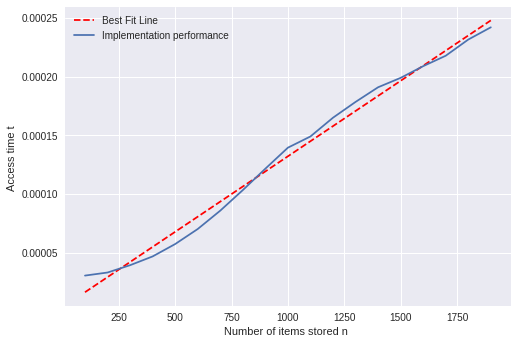

In [18]:
'''
assuming percentage correct is 50
'''
import matplotlib.pyplot as plt
import time
import numpy as np

bitarray_length = 5000
hashFunction_count = 5
testItemNumber = 500
storageItemNumber = 5000
part3Bloomf = CountingBloomFilter(bitarray_length,hashFunction_count)

inputRange = 20
storageItemNumber = inputRange * 100
xarray = []
yarray = []
  
  
inputData = [] 
for i in range(0,storageItemNumber):
  inputData.append(str(uuid.uuid4()))


for i in range(0,testItemNumber):
  inputData.append(str(uuid.uuid4()))

  
for StorageBucketCounter in range(1,inputRange): 
  averageCounter = []
  for i in range(0,10): 

    part3Bloomf = CountingBloomFilter(bitarray_length,hashFunctionCounter)

    for counterA in range(0,StorageBucketCounter*100): 
      part3Bloomf.add(inputData[counterA])
      
    for counterB in range (0,testItemNumber): 
      start_time = time.time()
      part3Bloomf.search(inputData[counterB*2])
      averageCounter.append((time.time() - start_time))
      
    
  xarray.append(StorageBucketCounter*100)
  yarray.append(sum(averageCounter)/len(averageCounter))

z = np.polyfit(xarray, yarray, 1)
p = np.poly1d(z)
title1 = "Best Fit Line"
plt.plot(xarray,p(xarray),"r--",label = title1)

title = "Implementation performance"
plt.plot(xarray, yarray, label = title )

plt.legend()

plt.xlabel('Number of items stored n ')
plt.ylabel('Access time t ')
plt.show()


  
  



##Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.

The plot is created below.

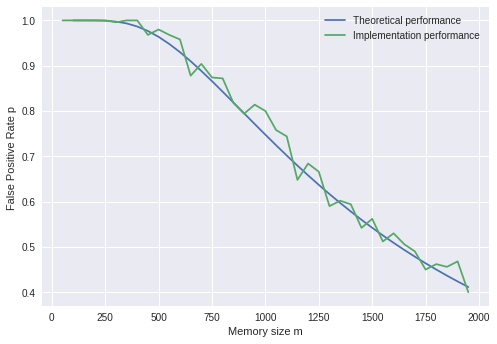

In [24]:


'''
Plot of Memory size x False Positive Rate
'''
import matplotlib.pyplot as plt
import math

hashFunction_count = 2
storageItemNumber = 1000
testItemNumber = 500

part1Bloomf = CountingBloomFilter(bitarray_length,hashFunction_count)

inputRange = 40
xarray = []
yarray = []
theoreticalxarray = []
theoreticalyarray = []
  
  
inputData = [] 
for i in range(0,storageItemNumber):
  inputData.append(str(uuid.uuid4()))
  
searchData = []
for i in range(0,testItemNumber):
  searchData.append(str(uuid.uuid4()))

  
for memorySizeBucketCounter in range(1,inputRange): 
  bit_array_size = memorySizeBucketCounter*50
  averageCounter = []
  for i in range(0,10): 

    part1Bloomf = CountingBloomFilter(bit_array_size,hashFunction_count)

    for counterA in range(0,storageItemNumber): 
      part1Bloomf.add(inputData[counterA])

    for counterB in range (0,testItemNumber): 
      part1Bloomf.search(searchData[counterB])

    averageCounter.append(part1Bloomf.false_positive_counter[1]/(part1Bloomf.false_positive_counter[1]+part1Bloomf.false_positive_counter[0]))
  xarray.append(bit_array_size)
  yarray.append(sum(averageCounter)/len(averageCounter))
  
  theoreticalxarray.append(bit_array_size)
  theoreticalyarray.append(math.pow((1-math.exp(-hashFunction_count*storageItemNumber/bit_array_size)),hashFunction_count))


plt.plot(theoreticalxarray[1:], theoreticalyarray[1:], label = "Theoretical performance" )
plt.plot(xarray, yarray, label = "Implementation performance" )

plt.legend()

plt.xlabel('Memory size m')
plt.ylabel('False Positive Rate p ')

plt.show()

  



 
  #cs110-hashing: Hash functions are used and meticulously and systematically explained in terms of how they work and the 3 properties which make them effective in this paper's implementation of bloom filters - being fast, deterministic and diffused. These properties are also illustrated through simulations when appropriate. 

  #cs110-complexity: Not only is complexity brought up and used effectively when appropriate throughout the paper , but in part 4, it is used to derive a novel formula. 

  #cs110-optimalalgorithm: The merits of many different ways of implementing Bloom filters, with variable memory size, number of items stored, false positive probability and number of hash functions, is not just discussed but analyzed thoroughly through simulations. This was also carried out for number of hash functions and for the counting bloom filter, which is above and beyond the assignment scope. 
  
   
  #professionalism: Established guidelines were followed to clearly and effectively present the paper, with proper sections, references and figures. 

  #algorithms: Algorithmic thinking applied both on a micro-level, in terms of implementing effective algorithms in each section, as well as on a macro-level, in terms of analyzing the bloom filter and its operations. After a overview and implementionof a working counting bloom filter, which includes allowing a variable number of hash functions, the operations are analyzed in terms of complexity and runtime, and the different variables involved in creating a bloom filter are systematically analyzed. 

 #probability: The probability of a getting a false positive result when querying a bloom filter is accurately calculated with clear detailed steps, and also simulated. 

 #simulation: Simulations are used effectively to complement and check mathematical derivations of optimal variable values for number of items stored per bit of memory and number of hash functions, in order to optimize for false positive rates or access times. 

 #optimization: Implemented a dual-track optimization technique for number of hash functions- mathematically deriving calculating optimal values for k and then checking these values against real-world data. The optimal values for m/n and k were found and can now be

